## Clustering  Analysis: Davies-Bouldin Index (DBI)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

`scores_csvs` is the list of screening csv that were outputted from `screen_nani.py`. <br>
The output of this notebook will also be the same directory as the input csvs.

In [2]:
scores_csvs = ['equal_screening_scores.csv']

#### Graph the scoring metrics for a range of `n_clusters` values
**remember to remove the row with `None,None`**<br>
The clustering metrics (Davies-Bouldin Index) is an effective way to identify the number of clusters for a system. 
We will graph the scores for a range of cluster number values. 

In [3]:
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight'] = 'bold'
font_size = 14

def plot_scores(scores_csv):
    base_name = scores_csv.split('\\')[-1].split('.csv')[0]
    n_clus, db = np.loadtxt(scores_csv, unpack=True, delimiter=',', usecols=(0, 2))

    # Plot the Davies-Bouldin index and the optimal number of clusters
    all_indices = np.argsort(db)
    min_db_index = all_indices[0]
    min_db = n_clus[min_db_index]
    all_indices = np.delete(all_indices, 0)
    second_min_index = all_indices[0]
    second_min_db = n_clus[second_min_index]
    
    fig, ax = plt.subplots()
    ax.plot(n_clus, db, color='#005cde', label='DBI', linewidth=2.5)
    ax.set_xlabel('Radial Threshold MSD', fontsize=font_size, fontweight='bold')
    ax.set_ylabel('Davies-Bouldin Index', fontsize=font_size, fontweight='bold')
    ax.axvline(x=min_db, color='#de005c', linestyle='--', 
               label=f'Minimum DBI: {min_db:.2f}', linewidth=1.75)
    ax.axvline(x=second_min_db, color='#00ab64', linestyle='--', 
               label=f'Second Minimum DBI: {second_min_db:.2f}', linewidth=1.75)

    # Calculate the second derivative (before + after - 2*current)
    arr = db
    x = n_clus[1:-1]
    result = []
    for start_index, n_clusters in zip(range(1, len(arr) - 1), x):
        temp = arr[start_index + 1] + arr[start_index - 1] - (2 * arr[start_index])
        if arr[start_index] <= arr[start_index - 1] and arr[start_index] <= arr[start_index + 1]:
            result.append((n_clusters, temp))
    result = np.array(result)
    if len(result) == 0:
        print('No local maxima found')
    elif len(result) >= 1:
        sorted_indices = np.argsort(result[:, 1])[::-1]
        sorted_result = result[sorted_indices]
        min_x = sorted_result[0][0]
        ax.axvline(x=min_x, color='#de8200', linestyle='--', 
                   label=f'Maximum 2nd deriv DBI: {min_x:.2f}', linewidth=1.75)
        if len(sorted_result) >= 2:
            sec_min_x = sorted_result[1][0]
            ax.axvline(x=sec_min_x, color='#6400ab', linestyle='--', 
                       label=f'Second Maximum 2nd deriv DBI: {sec_min_x:.2f}', linewidth=1.75)
    
    ax.legend(fontsize=10)
    for axis in ['top','bottom','left','right']:
        plt.gca().spines[axis].set_linewidth(1.25)
    plt.savefig(f'{base_name}_db.png', dpi=500, bbox_inches='tight', pad_inches=0.1, transparent=True)
    plt.close()
    
if __name__ == '__main__':
    for scores_csv in scores_csvs:
        plot_scores(scores_csv)
        plot_scores(scores_csv)

Max number of clusters: 17, at radial threshold MSD: 5.10


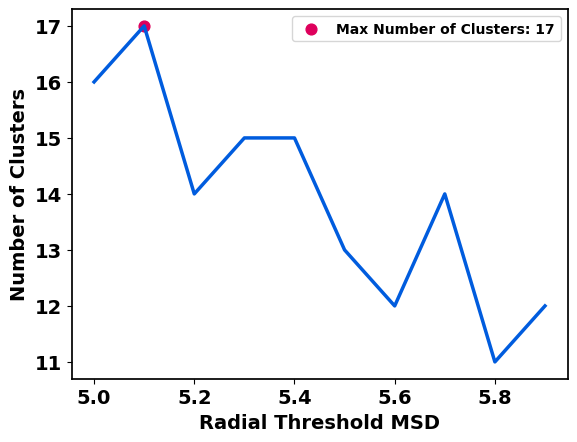

In [4]:
def plot_screen(screening_csv):
    base_name = screening_csv.split('\\')[-1].split('.csv')[0]
    data = np.loadtxt(screening_csv, usecols=(0, 1), dtype=float, delimiter=',')
    max_clusters = np.max(data[:, 1])
    max_clustersx = data[np.argmax(data[:, 1]), 0]
    print(f'Max number of clusters: {int(max_clusters)}, at radial threshold MSD: {max_clustersx:.2f}')
    # Annotate the maximum number of clusters
    plt.plot(data[:, 0], data[:, 1], color='#005cde', linewidth=2.5)
    plt.scatter(max_clustersx, max_clusters, color='#de005c', s=60, marker='o', label=f'Max Number of Clusters: {int(max_clusters)}')
    plt.xlabel('Radial Threshold MSD', fontsize=font_size, fontweight='bold')
    plt.ylabel('Number of Clusters', fontsize=font_size, fontweight='bold')
    for axis in ['top','bottom','left','right']:
        plt.gca().spines[axis].set_linewidth(1.25)
    plt.legend(fontsize=10)
    plt.savefig(f'{base_name}_nclusters.png', dpi=500, bbox_inches='tight', pad_inches=0.1, transparent=True)

if __name__ == '__main__':
    plot_screen('equal_screening.csv')